### Problem Statement : Find out rating for a employees on the basis on different features



#### import liabraries

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import mode
from scipy import stats
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Data Gathering

##### 1. Load Given data and convert it into pandas df

In [6]:
df=pd.read_csv("Emp Rating Data.csv")
df

,Age,Salary,Department,Years_of_Experience,Rating
0,56,47981.538943,Sales,NaN,5
1,46,63977.223746,Marketing,4.0,4
2,32,47051.027751,Marketing,4.0,3
3,25,40763.986716,IT,2.0,4
4,38,NaN,Marketing,2.0,5
...,...,...,...,...,...
95,59,53994.709286,Marketing,NaN,1
96,56,41729.669474,Sales,2.0,2
97,58,64546.068106,Marketing,3.0,5
98,45,24900.803964,HR,NaN,2


#### Exploratory Data Analysis (EDA) with statistics 

##### 2. Check for the shape, size, info, stats

In [7]:
df.shape

(100, 5)

In [9]:
df.size

500

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  100 non-null    int64  
 1   Salary               93 non-null     float64
 2   Department           100 non-null    object 
 3   Years_of_Experience  95 non-null     float64
 4   Rating               100 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB


In [13]:
df.describe()

,Age,Salary,Years_of_Experience,Rating
count,100.000000,93.000000,95.000000,100.00000
mean,37.910000,50081.617728,2.978947,3.13000
std,12.219454,12107.897382,0.798655,1.44708
min,18.000000,20014.890300,2.000000,1.00000
25%,26.750000,41729.669474,2.000000,2.00000
50%,38.000000,49671.482653,3.000000,3.00000
75%,46.250000,58733.997370,4.000000,4.25000
max,59.000000,75904.742280,4.000000,5.00000


##### 3. Check the data types of all columns in the dataset also change datatype of Salary to float and Years_of_Experience to int

In [27]:
df.dtypes

Age                      int64
Salary                 float64
Department              object
Years_of_Experience    float64
Rating                   int64
dtype: object

In [29]:
df["Years_of_Experience"]=df["Years_of_Experience"].astype(int)

In [31]:
df.dtypes

Age                      int64
Salary                 float64
Department              object
Years_of_Experience      int32
Rating                   int64
dtype: object

##### 4. Check for missing values and handle them

In [18]:
df.isna().sum()

Age                    0
Salary                 0
Department             0
Years_of_Experience    5
Rating                 0
dtype: int64

In [20]:
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

In [22]:
df['Years_of_Experience'] = df['Years_of_Experience'].fillna(df['Years_of_Experience'].mean())

In [24]:
df.isna().sum()

Age                    0
Salary                 0
Department             0
Years_of_Experience    0
Rating                 0
dtype: int64

##### 5. Calculate the mean, median, and mode for the Age column

In [24]:
df["Age"].mean()

37.91

In [26]:
df["Age"].median()

38.0

In [39]:
mode_Age=mode(df["Age"])
mode_Age

ModeResult(mode=41, count=6)

##### 6. Calculate the mean, median, and mode for the Salary column

In [97]:
df["Salary"].mean()

50081.617727686695

In [99]:
df["Salary"].median()

50081.617727686695

In [41]:
mode_Salary=mode(df["Salary"])
mode_Salary

ModeResult(mode=50081.617727686695, count=7)

##### 7. Compute the variance, standard deviation, and range for the Salary column.

In [106]:
df['Salary'].var()

136235439.09168765

In [110]:
df['Salary'].std()

11671.993792479829

In [114]:
df['Salary'].max() - df['Salary'].min()

55889.85198002178

##### 8. Find the covariance between Age and Salary column

In [43]:
covariance = df["Salary"].cov(df["Age"])

In [45]:
covariance

25996.64525295493

##### 9. Find the correlation coefficient between all numerical columns, also visualize it using heatmap

In [48]:
numerical_df = df.select_dtypes(include=['number'])

AttributeError: module 'matplotlib' has no attribute 'title'

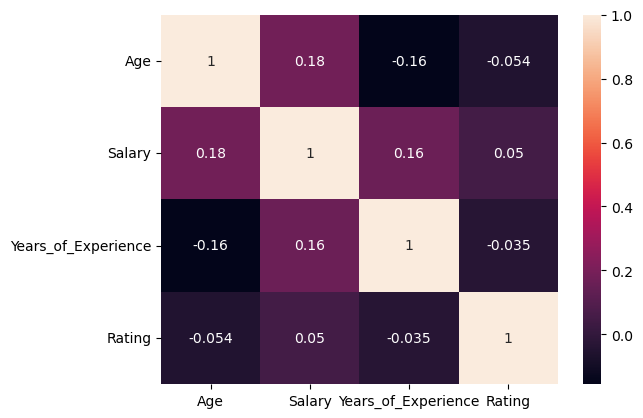

In [50]:
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

##### 10. Visualize the distribution of the Salary and Years_of_Experience columns

AttributeError: module 'matplotlib' has no attribute 'title'

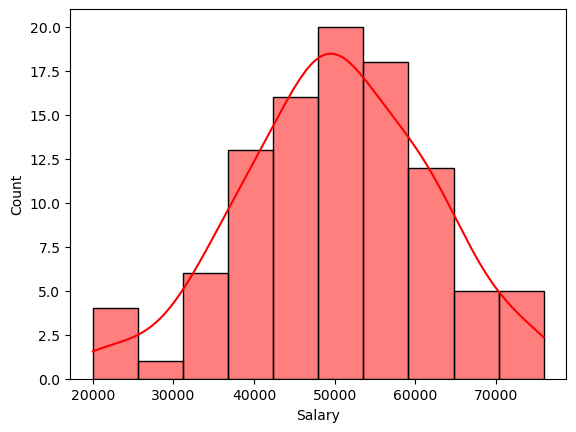

In [52]:
sns.histplot(df["Salary"], kde=True, color="red", bins=10)
plt.title("Distribution of Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

AttributeError: module 'matplotlib' has no attribute 'title'

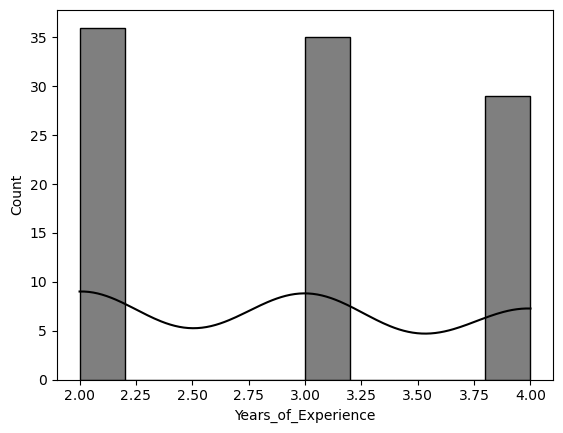

In [54]:
sns.histplot(df["Years_of_Experience"], kde=True, color="black", bins=10)
plt.title("Distribution of Years_of_Experience")
plt.xlabel("Years_of_Experience")
plt.ylabel("Frequency")
plt.show()

##### 11. Check the skewness of the Salary column.

In [57]:
df["Salary"].skew()

-0.17756873972745757

##### 12. Use boxplots to identify outliers in Age and Salary columns

<Axes: ylabel='Age'>

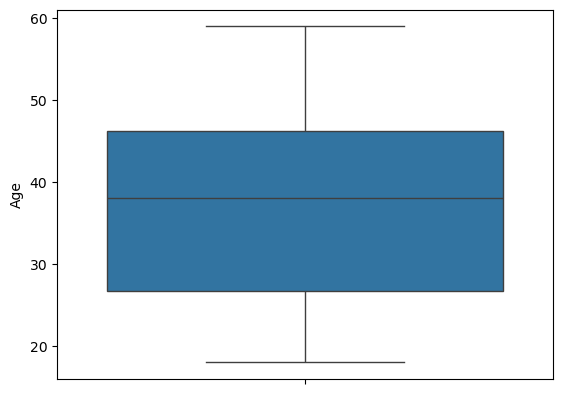

In [60]:
sns.boxplot(df['Age'])

<Axes: ylabel='Salary'>

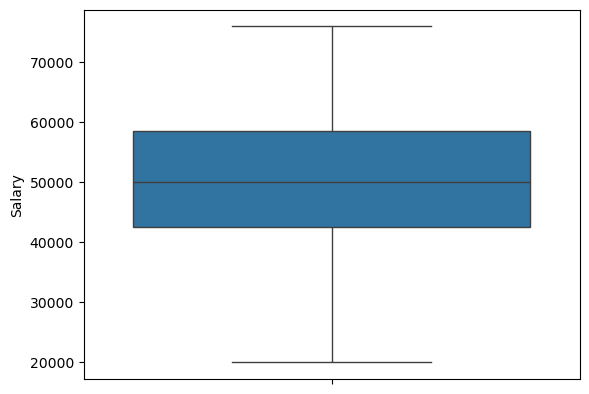

In [62]:
sns.boxplot(df['Salary'])

##### 13. Compute quantiles (25%, 50%, 75%), IQR, lower tail, upper tail values for the Salary column

In [65]:
q1=df['Salary'].quantile(0.25)
q1

42608.910084179326

In [67]:
q2=df['Salary'].quantile(0.50)
q2

50081.617727686695

In [69]:
q3=df['Salary'].quantile(0.75)
q3

58499.21664146862

In [71]:
IQR=q3-q1
IQR

15890.306557289296

In [73]:
lower_tail=q1-(1.5)*IQR
lower_tail

18773.450248245383

In [75]:
upper_tail=q3+(1.5)*IQR
upper_tail

82334.67647740257

##### 14. Probability of employees in IT with a rating above 3

In [96]:
IT = df[df["Department"] == "IT"]
above_3R=df["Rating"]>3
probability_IT =len(above_3R)/len(IT)
probability_IT

4.545454545454546

##### 15. Check for Normality of Age/Salary column by hypothesis testing

In [104]:
stat_age, p_value_age = stats.shapiro(df["Age"])
stat_salary, p_value_salary = stats.shapiro(df["Salary"])
alpha = 0.05
if p_value_age > alpha:
    print("Age is normally distributed (fail to reject H0).")
else:
    print("Age is not normally distributed (reject H0).")

if p_value_salary > alpha:
    print("Salary is normally distributed (fail to reject H0).")
else:
    print("Salary is not normally distributed (reject H0).")

Age is not normally distributed (reject H0).
Salary is normally distributed (fail to reject H0).


##### 16. Find zscore for Age column

In [108]:
df["Z-Score_Age"] = stats.zscore(df["Age"])
print(df)

    Age        Salary Department  Years_of_Experience  Rating  Z-Score_Age
0    56  47981.538943      Sales                    2       5     1.487884
1    46  63977.223746  Marketing                    4       4     0.665394
2    32  47051.027751  Marketing                    4       3    -0.486092
3    25  40763.986716         IT                    2       4    -1.061835
4    38  50081.617728  Marketing                    2       5     0.007402
..  ...           ...        ...                  ...     ...          ...
95   59  53994.709286  Marketing                    2       1     1.734631
96   56  41729.669474      Sales                    2       2     1.487884
97   58  64546.068106  Marketing                    3       5     1.652382
98   45  24900.803964         HR                    2       2     0.583145
99   24  20363.613619         HR                    4       2    -1.144084

[100 rows x 6 columns]


##### 17. check for unique values in Department

In [112]:
df['Department'].unique()

array(['Sales', 'Marketing', 'IT', 'HR'], dtype=object)

##### 18. check for the count for each department and visualize it 

In [116]:
department_counts = df["Department"].value_counts()

AttributeError: module 'matplotlib' has no attribute 'title'

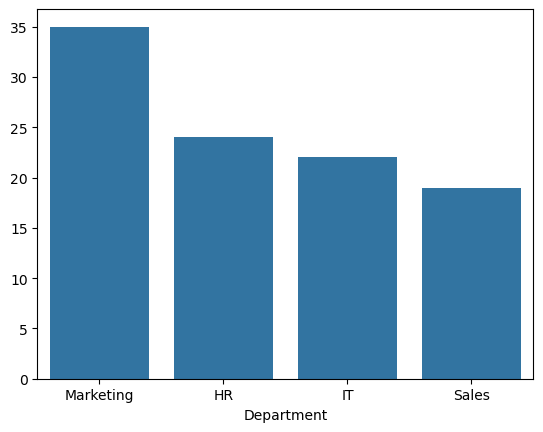

In [128]:
sns.barplot(x=department_counts.index, y=department_counts.values)
plt.title("Employee Count by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

##### 19. Encode Departement in numerical data

In [132]:
df['Department']=df['Department'].replace({'Sales':1, 'Marketing':2, 'IT':3, 'HR':4})


C:\Users\icon\AppData\Local\Temp\ipykernel_14720\3193954489.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Department']=df['Department'].replace({'Sales':1, 'Marketing':2, 'IT':3, 'HR':4})


,Age,Salary,Department,Years_of_Experience,Rating,Z-Score_Age
0,56,47981.538943,1,2,5,1.487884
1,46,63977.223746,2,4,4,0.665394
2,32,47051.027751,2,4,3,-0.486092
3,25,40763.986716,3,2,4,-1.061835
4,38,50081.617728,2,2,5,0.007402
...,...,...,...,...,...,...
95,59,53994.709286,2,2,1,1.734631
96,56,41729.669474,1,2,2,1.487884
97,58,64546.068106,2,3,5,1.652382
98,45,24900.803964,4,2,2,0.583145


##### splitting of Data into independant(x) and dependant(y) features

In [158]:
X = df.iloc[: ,:4]

y = df["Rating"]


##### perform train test split

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Data (X_train):")
print(X_train)
print("\nTest Data (X_test):")
print(X_test)

Training Data (X_train):
    Age        Salary  Department  Years_of_Experience
36   56  46068.497801           2                    3
6    36  31110.136557           2                    2
78   46  50081.617728           3                    2
66   32  75904.742280           2                    4
65   48  67763.942734           2                    4
..  ...           ...         ...                  ...
53   21  49671.482653           3                    3
51   53  65164.886369           3                    3
26   44  58459.775736           2                    3
94   22  73206.077611           4                    3
73   35  49737.429508           4                    4

[80 rows x 4 columns]

Test Data (X_test):
    Age        Salary  Department  Years_of_Experience
96   56  41729.669474           1                    2
56   59  40900.074554           4                    2
62   27  67202.185847           3                    2
64   31  20014.890300           2                  

In [171]:
y_train

36    5
6     4
78    3
66    1
65    2
     ..
53    5
51    2
26    5
94    3
73    4
Name: Rating, Length: 80, dtype: int64

In [173]:
y_test

96    2
56    4
62    5
64    4
81    3
35    3
93    2
14    5
90    2
20    1
72    3
31    5
42    4
80    4
24    2
59    3
4     5
71    2
50    5
55    2
Name: Rating, dtype: int64